In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

turmas = pd.read_csv('turmas.csv')
# Retira as turmas não atendidas
turmas = turmas[turmas["Situação"] == "Atendida"]
# Reseta os índices do dataFrame
turmas = turmas.reset_index().drop('index',axis=1)
# Formata a coluna Horário para retirar a data. Ex: "24T12 (1/1/2018 - 12/12/2018)" -> "24T12"
turmas['Horário'] = turmas['Horário'].str.split(expand=True)[0]

## Função para verificar compatibilidade de horários

In [2]:
''' Compara se dois horários tem mesmo turno '''
def comp_t(hor1, hor2):
    turno = ['M','T','N']
    comp_turno = False
    for t in turno:
        h1 = hor1.find(t)
        h2 = hor2.find(t)
        if (h1 > 0 and h2 > 0):
            return t
    return 'F'

''' Compara se há confilto entre horários '''
def comp(hor1, hor2):
    turno = comp_t(hor1, hor2)
    if (turno == 'F'):
        return False
    
    w1, h1 = hor1.split(turno)
    w2, h2 = hor2.split(turno)
    
    for d1 in w1:
        if (d1 in w2):
            for h in h1:
                if(h in h2):
                    return True
    return False


In [22]:
g = nx.Graph()
#for i in range()
#for h1 in turmas['Horário']:
#    for h2 in turmas['Horário']
n = len(turmas['Horário'])
for i in range(n):
    for j in range(i, n):
        if (not comp(turmas['Horário'][i], turmas['Horário'][j])):
            g.add_edge(i, j)


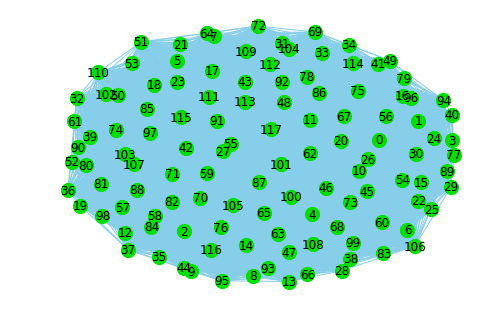

In [23]:
nx.draw(g, with_labels=True, edge_color='skyblue', node_size=200, node_color='#00dd00')
plt.draw()

In [32]:
turmas['cor'] = ['black' for i in range(len(turmas))] # Inicia todos sem cor
turmas.loc[[10],['cor']] = 'yellow'

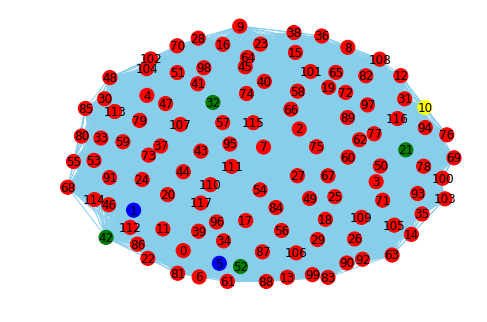

In [58]:
nx.draw(g, with_labels=True, edge_color='skyblue', node_size=200, node_color=turmas['cor'])
plt.draw()

In [50]:
g.degree

DegreeView({0: 111, 1: 111, 2: 109, 3: 113, 4: 114, 5: 109, 6: 110, 7: 107, 8: 109, 9: 107, 10: 111, 11: 112, 12: 114, 13: 107, 14: 110, 16: 110, 17: 107, 18: 112, 19: 110, 20: 114, 21: 109, 23: 114, 24: 111, 25: 113, 26: 109, 27: 109, 28: 109, 29: 113, 30: 109, 31: 116, 32: 111, 33: 109, 34: 112, 35: 109, 36: 112, 37: 110, 38: 112, 39: 116, 40: 111, 41: 109, 42: 110, 43: 112, 44: 109, 45: 108, 46: 109, 47: 109, 48: 109, 49: 109, 50: 108, 51: 108, 52: 114, 53: 107, 54: 110, 55: 109, 56: 109, 57: 113, 58: 109, 59: 113, 60: 109, 61: 111, 62: 113, 63: 107, 64: 110, 65: 115, 66: 107, 68: 107, 69: 107, 70: 109, 71: 107, 72: 107, 73: 113, 74: 109, 76: 107, 77: 107, 78: 107, 79: 107, 80: 107, 81: 111, 82: 113, 83: 108, 84: 110, 85: 104, 86: 107, 87: 107, 88: 114, 89: 107, 90: 107, 91: 107, 92: 107, 93: 107, 94: 112, 95: 110, 96: 113, 97: 113, 98: 113, 99: 110, 100: 107, 101: 112, 102: 110, 103: 107, 104: 107, 105: 107, 106: 106, 107: 107, 109: 114, 111: 110, 112: 112, 113: 109, 114: 109, 115: